In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/sample_data/copper.csv')
df

,Date,copper
0,2022-01-16,4.43750
1,2022-01-14,4.48055
2,2022-01-13,4.54090
3,2022-01-12,4.51025
4,2022-01-11,4.40200
...,...,...
2064,2014-01-08,3.40700
2065,2014-01-07,3.40550
2066,2014-01-06,3.39800
2067,2014-01-03,3.41100


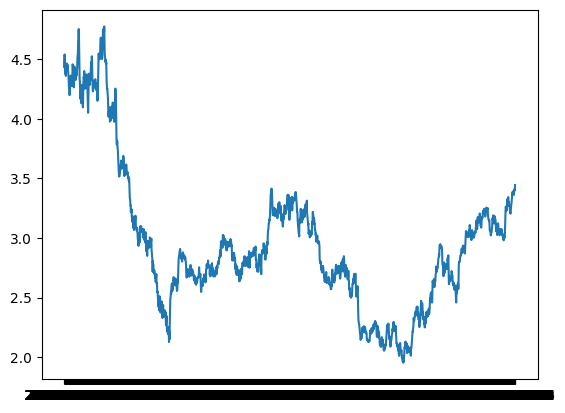

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['copper'])

In [ ]:
for i in range(1,5):
  df[str(i)+'dayBefore']=df['copper'].shift(i)
df=df.iloc[4:,1:6]
df

,copper,1dayBefore,2dayBefore,3dayBefore,4dayBefore
4,4.40200,4.51025,4.54090,4.48055,4.43750
5,4.38030,4.40200,4.51025,4.54090,4.48055
6,4.39875,4.38030,4.40200,4.51025,4.54090
7,4.38065,4.39875,4.38030,4.40200,4.51025
8,4.36075,4.38065,4.39875,4.38030,4.40200
...,...,...,...,...,...
2064,3.40700,3.36250,3.38300,3.39000,3.38450
2065,3.40550,3.40700,3.36250,3.38300,3.39000
2066,3.39800,3.40550,3.40700,3.36250,3.38300
2067,3.41100,3.39800,3.40550,3.40700,3.36250


In [ ]:
#torch.tensor로 딥러닝에 맞는 형태의 input output 값 설정해주기
import torch
X=torch.tensor(df.iloc[:,1:5].values, dtype=torch.float32)
Y=torch.tensor(df['copper'].values, dtype=torch.float32)


In [ ]:
#train. test set 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(X, Y,random_state=42)

from torch.utils.data import TensorDataset, DataLoader
train_dataset=TensorDataset(train_input, train_target)
test_dataset=TensorDataset(test_input,test_target)

train_dataloader=DataLoader(train_dataset, batch_size=32, shuffle=False)
test_dataloader=DataLoader(test_dataset, batch_size=32, shuffle=False)

## MLP모델 정의

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.layers=nn.Sequential(
        nn.Linear(4,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,32),
        nn.ReLU(),
        nn.Linear(32,1)
    )
  def forward(self, x):
      return self.layers(x)

model=MLP()

### 손실함수, 최적화 알고리즘 설정

In [ ]:
from torch.optim import lr_scheduler
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.0001)
#lr은 학습률을 의미함
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

### 학습 시키기

In [ ]:
epochs=200

for epoch in range(epochs):
  for inputs, targets in train_dataloader :
    #순전파
    outputs=model(inputs)
    loss=criterion(outputs, targets)

    #역전파 및 최적화
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  scheduler.step()

In [ ]:
total_loss=0
#예측값과 실제값을 리스트로 저장
predictions=[]
actuals=[]
#모델 평가 모드 설정
model.eval()

for inputs, targets in test_dataloader:
  outputs=model(inputs)
  #결과 저장
  predictions.extend(outputs.view(-1).tolist())
  actuals.extend(targets.view(-1).tolist())
  #손실 함수 계산
  loss=criterion(outputs,targets)
  total_loss+=loss

average_loss=total_loss/len(test_dataloader.dataset)
print(f'mse_loss={average_loss}');

mse_loss=0.02192677929997444


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
total_loss=0
#예측값과 실제값을 리스트로 저장
predictions=[]
actuals=[]
#모델 평가 모드 설정
model.eval()

dataset=TensorDataset(X,Y)
dataloader=DataLoader(dataset, batch_size=32, shuffle=False)

for inputs, targets in dataloader:
  outputs=model(inputs)
  #결과 저장
  predictions.extend(outputs.view(-1).tolist())
  actuals.extend(targets.view(-1).tolist())
  #손실 함수 계산
  loss=criterion(outputs,targets)
  total_loss+=loss

average_loss=total_loss/len(test_dataloader.dataset)
print(f'mse_loss={average_loss}');

mse_loss=0.003209688700735569


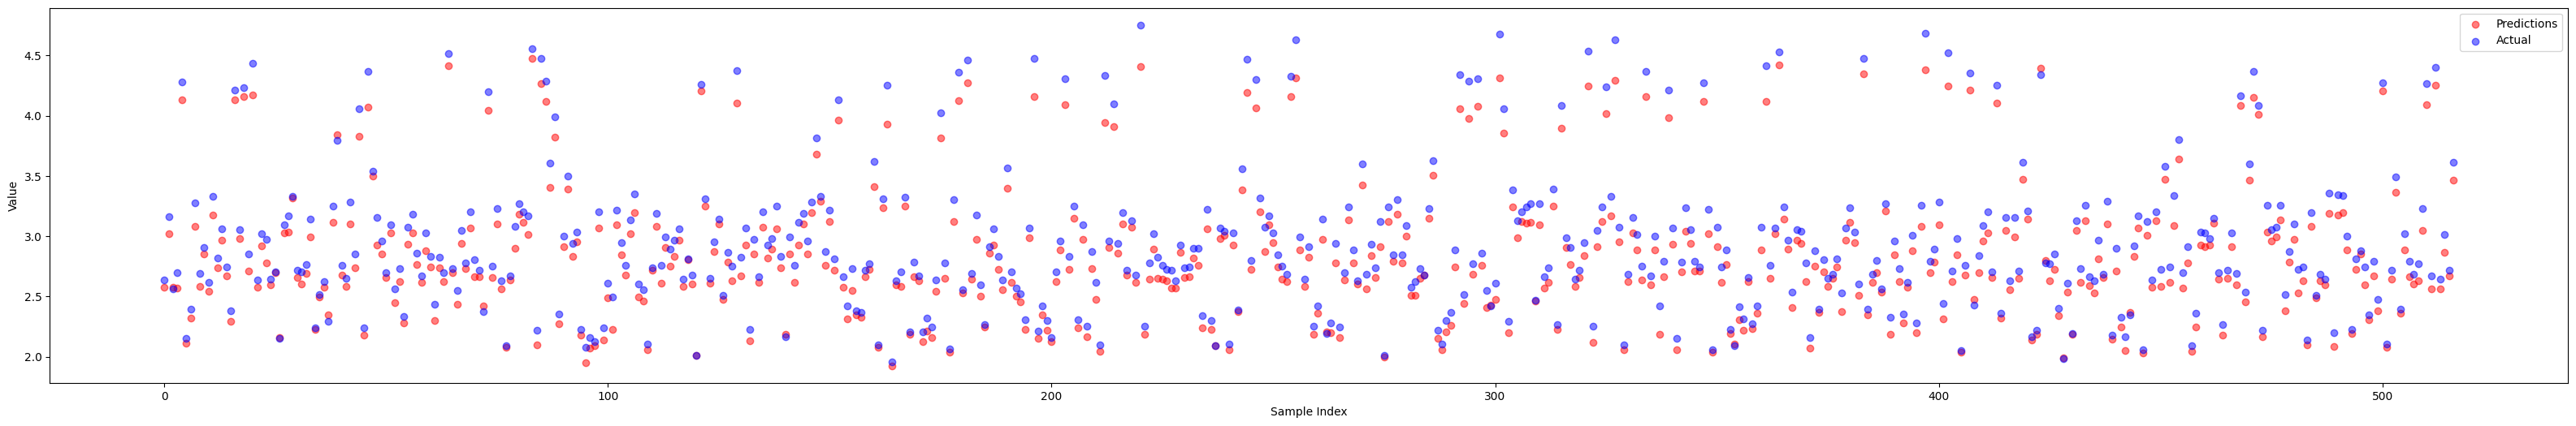

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,6))
plt.scatter(range(len(predictions)),predictions, color='red',label='Predictions',alpha=0.5)
plt.scatter(range(len(actuals)),actuals,color='blue',label='Actual',alpha=0.5)
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.show()

In [ ]:
cd /content/drive/MyDrive/study_lab

/content/drive/MyDrive/study_lab


In [140]:
!git config --global user.email '2276242@ewhain.net'
!git config --global user.name '2ju1'

In [141]:
$ git remote add origin https://github.com/2Ju1/financing-project.git

SyntaxError: invalid imaginary literal (<ipython-input-141-34b24a0926d8>, line 1)

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
